In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
sns.set_palette('colorblind')
sns.set_style('whitegrid')
sns.set_context('paper', font_scale = 1.5)


# Parameter sweep data viz (core model)

In [10]:
# Open parameter sweep results file and extract data in DataFrame

pd.set_option('display.float_format', '{:.2e}'.format)

df = pd.read_csv('ps_outputs/core_model/core_cluster_number_parameter_sweep_data.txt', header=None, names = ['No. of clusters', 'Chemotaxis strength', 'Cell-matrix drag', 'Production rate', 'Degradation rate'])

df.head()

,No. of clusters,Chemotaxis strength,Cell-matrix drag,Production rate,Degradation rate
0,0.00e+00,1.02e+01,5.03e+09,6.26e-11,3.30e-04
1,0.00e+00,4.12e+01,5.03e+09,6.26e-11,3.30e-04
2,0.00e+00,1.02e+01,1.16e+09,6.26e-11,3.30e-04
3,0.00e+00,1.02e+01,5.03e+09,3.60e-11,3.30e-04
4,0.00e+00,1.02e+01,5.03e+09,6.26e-11,3.90e-04


In [11]:
# nondimensionalise values

# multiply chemotaxis strength column by 10
df['Chemotaxis strength'] = df['Chemotaxis strength'] * 10

# multiply cell-matrix drag column by 9e-10
df['Cell-matrix drag'] = df['Cell-matrix drag'] * 9e-10

# multiply production rate column by 1e14
df['Production rate'] = df['Production rate'] * 1e14

# multiply degradation rate column by 1e5
df['Degradation rate'] = df['Degradation rate'] * 1e5

In [5]:
df.head()

,No. of clusters,Chemotaxis strength,Cell-matrix drag,Production rate,Degradation rate
0,0.00e+00,1.02e+02,4.53e+00,6.26e+03,3.30e+01
1,0.00e+00,4.12e+02,4.53e+00,6.26e+03,3.30e+01
2,0.00e+00,1.02e+02,1.05e+00,6.26e+03,3.30e+01
3,0.00e+00,1.02e+02,4.53e+00,3.60e+03,3.30e+01
4,0.00e+00,1.02e+02,4.53e+00,6.26e+03,3.90e+01


## Data subset for which more than 2 clusters emerged

In [7]:
# df2 is a new DataFrame containing only rows where the number of clusters is greater than 2
df2 = df[df['No. of clusters'] > 2]

In [8]:
# make new column with 3 bins based on the number of clusters with interval of 0.5
df2['Average number of clusters'] = pd.cut(df2['No. of clusters'].to_numpy(), bins = [2, 3, 4, 5], labels = ['2-3', '3-4', '4+'], include_lowest=True, right = False)

<ipython-input-8-030b74e62d20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Average number of clusters'] = pd.cut(df2['No. of clusters'].to_numpy(), bins = [2, 3, 4, 5], labels = ['2-3', '3-4', '4+'], include_lowest=True, right = False)


### Correlation coefficients

<AxesSubplot:>

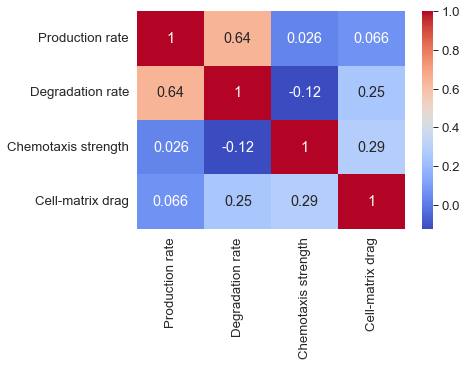

In [9]:
# calculate correlation matrix for df2 and show values in a heatmap for production rate, degradation rate, chemotaxis strength and cell-matrix drag
df3 = df2[['Production rate', 'Degradation rate', 'Chemotaxis strength', 'Cell-matrix drag']]
corr = df3.corr('pearson')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm')

### Visualise data subset

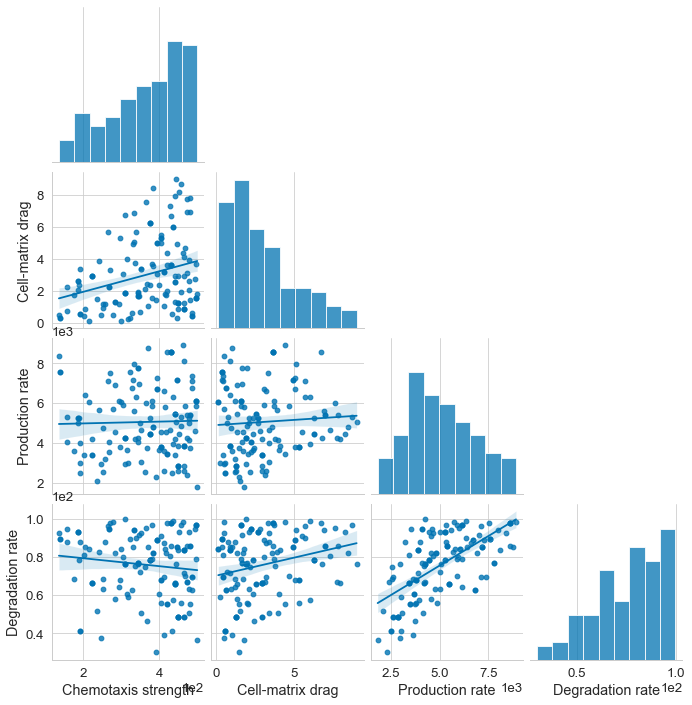

In [8]:
# plot pairplot of df2 with regression lines and histograms on the diagonal
g = sns.pairplot(df2, kind = 'reg', diag_kind = 'hist', vars = ['Chemotaxis strength', 'Cell-matrix drag', 'Production rate', 'Degradation rate'], corner = True)

for ax in g.axes.flatten():
    if ax:
        ax.ticklabel_format(style='sci', axis='both', scilimits=(0,2))


Text(0, 0.5, '')

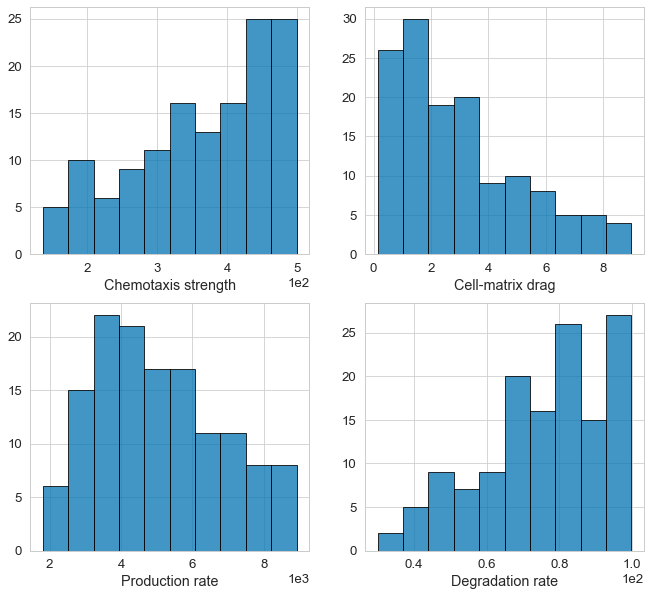

In [9]:
# plot histograms of each parameter with 10 bins with black outlines
fig, axes = plt.subplots(2, 2, figsize = (11, 10))
sns.histplot(df2, x = 'Chemotaxis strength', bins = 10, ax = axes[0, 0], edgecolor = 'black')
sns.histplot(df2, x = 'Cell-matrix drag', bins = 10, ax = axes[0, 1], edgecolor = 'black')
sns.histplot(df2, x = 'Production rate', bins = 10, ax = axes[1, 0], edgecolor = 'black')
sns.histplot(df2, x = 'Degradation rate', bins = 10, ax = axes[1, 1], edgecolor = 'black')

# change axis to scientific notation
for ax in axes.flatten():
    if ax:
        ax.ticklabel_format(style='sci', axis='both', scilimits=(0,2))

# remove y axis labels
axes[0, 0].set_ylabel('')
axes[0, 1].set_ylabel('')
axes[1, 0].set_ylabel('')
axes[1, 1].set_ylabel('')


### Relationship between production rate and degradation rate (r = 0.64)

<Figure size 648x648 with 0 Axes>

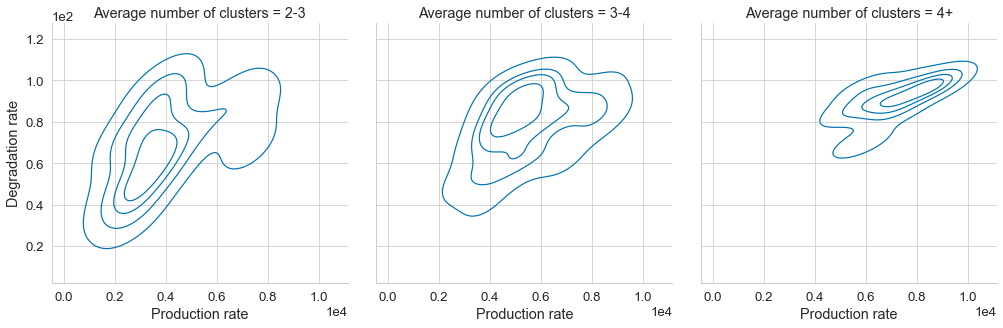

In [11]:
plt.figure(figsize=(9, 9))
g = sns.FacetGrid(df2, col="Average number of clusters", margin_titles=True)
g.map(sns.kdeplot, "Production rate", "Degradation rate", levels = 5)
g.fig.set_size_inches(15, 6)

for ax in g.axes.flatten():
    if ax:
        ax.ticklabel_format(style='sci', axis='both', scilimits=(0,2))

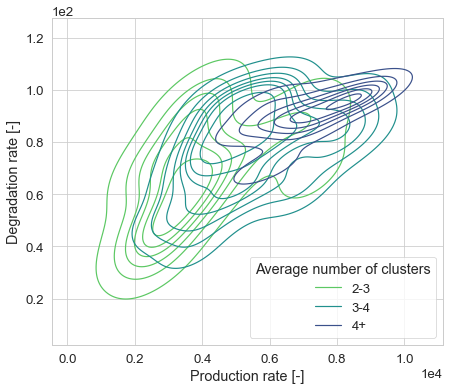

In [12]:
plt.figure(figsize=(7, 6))
ax = sns.kdeplot(x = 'Production rate', y = 'Degradation rate', data = df2, hue = 'Average number of clusters', levels = 8, palette='viridis_r')
sns.move_legend(ax, loc = 'lower right')
plt.xlabel('Production rate [-]')
plt.ylabel('Degradation rate [-]')
# scientific notation
ax.ticklabel_format(style='sci', axis='both', scilimits=(0,2))
#plt.savefig('ps_plots/core_plots/prod_deg_kde_labelled.png', dpi = 300)


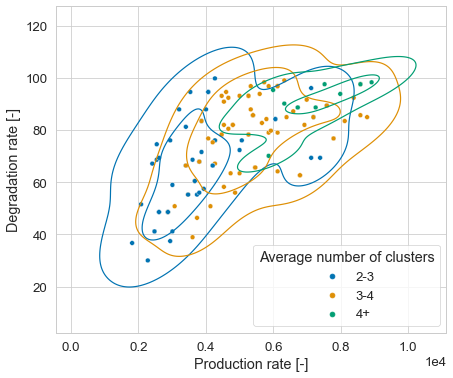

In [26]:
plt.figure(figsize=(7, 6))
# scatterplot and kde plot
ax = sns.kdeplot(x = 'Production rate', y = 'Degradation rate', data = df2, hue = 'Average number of clusters', levels = 3)
sns.scatterplot(x = 'Production rate', y = 'Degradation rate', data = df2, hue = 'Average number of clusters')
plt.xlabel('Production rate [-]')
plt.ylabel('Degradation rate [-]')
# scientific notation
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,3))
#plt.savefig('ps_plots/core_plots/prod_deg_scatter_labelled.png', dpi = 300)


Text(0, 0.5, 'Degradation rate [-]')

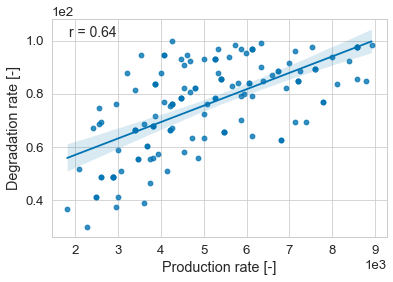

In [14]:
# find correlation between production rate and degradation rate
p = df2['Production rate'].corr(df2['Degradation rate'])
# plot regplot between the production rate and degradation rate
sns.regplot(x='Production rate', y='Degradation rate', data=df2)
# add a title to the plot with p to 2 decimal places
#plt.title(f'Correlation between production rate and degradation rate: {p:.2f}', pad = 10)
# annotate p value on the plot
plt.annotate(f'r = {p:.2f}', xy=(0.05, 0.92), xycoords='axes fraction', fontsize = 14)
# scientific notation
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,2))

plt.xlabel('Production rate [-]')
plt.ylabel('Degradation rate [-]')


<Figure size 720x720 with 0 Axes>

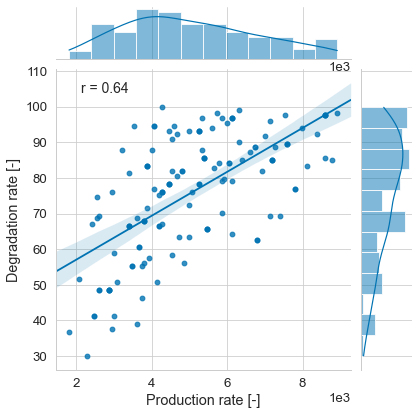

In [15]:
# Create a joint probability plot, with regression line
# and marginal distributions
# with scientific notation
plt.figure(figsize=(10, 10))
g = sns.jointplot(x='Production rate', y='Degradation rate', data=df2, kind='reg', truncate = False, marginal_kws=dict(bins=12, ))
# annotate p value on the plot
p = df2['Production rate'].corr(df2['Degradation rate'])
plt.annotate(f'r = {p:.2f}', xy=(-5.5, 0.92), xycoords='axes fraction', fontsize = 14)

# change x axis label
g.set_axis_labels('Production rate [-]', 'Degradation rate [-]')

# change axis to scientific notation
g.ax_joint.ticklabel_format(style='sci', axis='both', scilimits=(0,3))

#plt.savefig('ps_plots/core_plots/prod_deg_jointplot.png', dpi = 300)

### Relationship between chemotaxis strength and drag (r = 0.29)

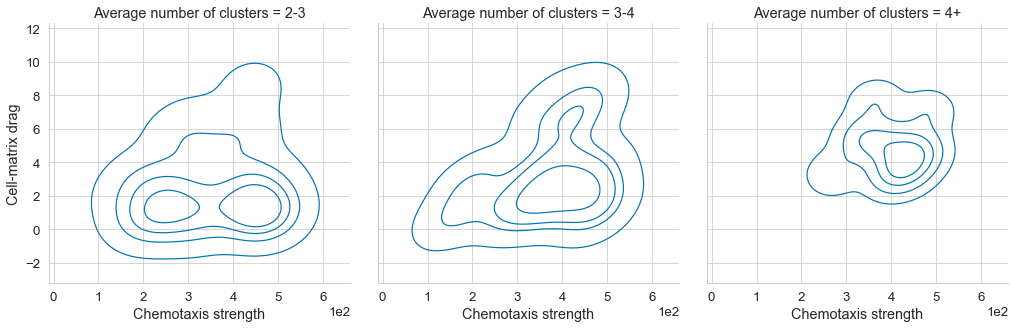

In [16]:
g = sns.FacetGrid(df2, col="Average number of clusters", margin_titles=True)
g.map(sns.kdeplot, "Chemotaxis strength", "Cell-matrix drag", levels = 5)

g.fig.set_size_inches(15, 6)

for ax in g.axes.flatten():
    if ax:
        ax.ticklabel_format(style='sci', axis='both', scilimits=(0,2))

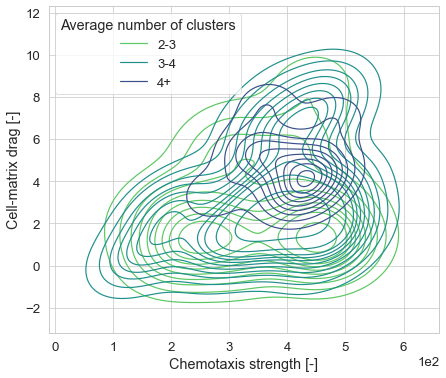

In [17]:
plt.figure(figsize=(7, 6))
ax = sns.kdeplot(x = 'Chemotaxis strength', y = 'Cell-matrix drag', hue = 'Average number of clusters', data = df2, levels = 12, palette='viridis_r')
sns.move_legend(ax, loc = 'upper left')
plt.xlabel('Chemotaxis strength [-]')
plt.ylabel('Cell-matrix drag [-]')
# scientific notation
ax.ticklabel_format(style='sci', axis='both', scilimits=(0,2))
#plt.savefig('ps_plots/core_plots/chem_drag_kde_labelled.png', dpi = 300)

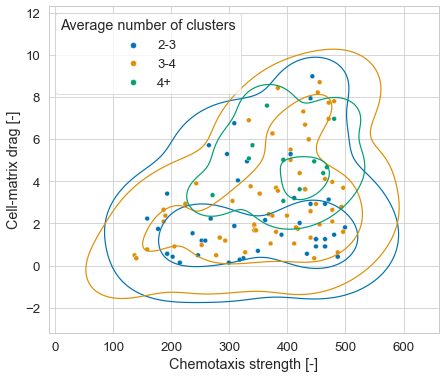

In [25]:
plt.figure(figsize=(7, 6))
# scatterplot and kde plot
ax = sns.kdeplot(x = 'Chemotaxis strength', y = 'Cell-matrix drag', data = df2, hue = 'Average number of clusters', levels = 3)
sns.scatterplot(x = 'Chemotaxis strength', y = 'Cell-matrix drag', data = df2, hue = 'Average number of clusters')
plt.xlabel('Chemotaxis strength [-]')
plt.ylabel('Cell-matrix drag [-]')
# scientific notation
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,3))
#plt.savefig('ps_plots/core_plots/chem_drag_scatter_labelled.png', dpi = 300)


Text(0, 0.5, 'Cell-matrix drag [-]')

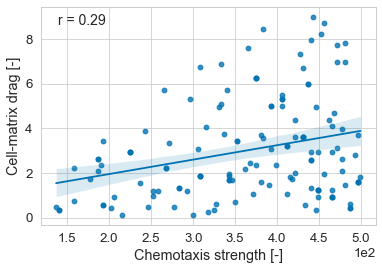

In [19]:
# find correlation between chemotaxis strength and cell-matrix drag
p = df2['Chemotaxis strength'].corr(df2['Cell-matrix drag'])
# plot regplot between the chemotaxis strength and cell-matrix drag
sns.regplot(x='Chemotaxis strength', y='Cell-matrix drag', data=df2)
# add a title to the plot with p to 2 decimal places
#plt.title(f'Correlation between chemotaxis strength and cell-matrix drag: {p:.2f}', pad=15)
# annotate p value on the plot
plt.annotate(f'r = {p:.2f}', xy=(0.05, 0.92), xycoords='axes fraction', fontsize = 14)
# scientific notation
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,2))

plt.xlabel('Chemotaxis strength [-]')
plt.ylabel('Cell-matrix drag [-]')

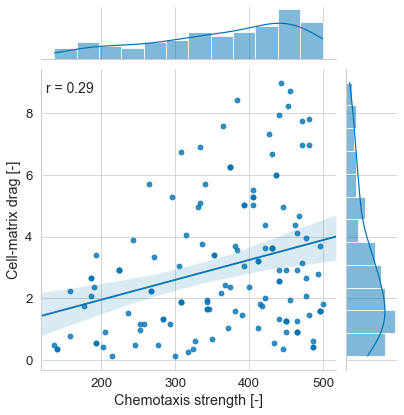

In [22]:
# Create a joint probability plot, with regression line
# and marginal distributions with 10 bins
g = sns.jointplot(x='Chemotaxis strength', y='Cell-matrix drag', data=df2, kind='reg', truncate = False, marginal_kws=dict(bins=12))
# annotate p value on the plot
p = df2['Chemotaxis strength'].corr(df2['Cell-matrix drag'])
plt.annotate(f'r = {p:.2f}', xy=(-5.9, 0.92), xycoords='axes fraction', fontsize = 14)

# scientific notation
g.ax_joint.ticklabel_format(style='sci', axis='both', scilimits=(0,3))

# change x axis label
g.set_axis_labels('Chemotaxis strength [-]', 'Cell-matrix drag [-]')


#plt.savefig('ps_plots/core_plots/chem_drag_jointplot.png', dpi = 300)


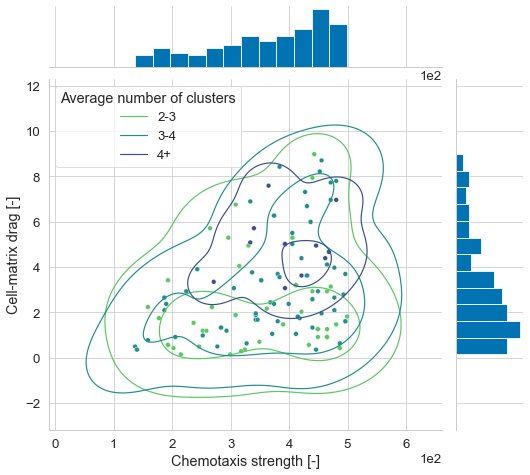

In [21]:

# Create a joint plot with scatterplot and histogram
g = sns.jointplot(x='Chemotaxis strength', y='Cell-matrix drag', data=df2, kind='scatter', hue = 'Average number of clusters', palette = 'viridis_r')

# change marginal plots to histogram
g.ax_marg_x.hist(df2['Chemotaxis strength'], bins = 12)
g.ax_marg_y.hist(df2['Cell-matrix drag'], bins = 12, orientation = 'horizontal')
# add kde to marginal
g.ax_marg_x.hist(df2['Chemotaxis strength'], bins = 12, density = True)

# add kde plot to the scatterplot
sns.kdeplot(x = 'Chemotaxis strength', y = 'Cell-matrix drag', data = df2, levels = 3, ax = g.ax_joint, hue = 'Average number of clusters', palette = 'viridis_r')

# scientific notation
g.ax_joint.ticklabel_format(style='sci', axis='both', scilimits=(0,2))

# change axis labels
g.set_axis_labels('Chemotaxis strength [-]', 'Cell-matrix drag [-]')

# change plot size
g.fig.set_size_inches(8, 7)
